## 1. Import Necessary Libaries

In [287]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.impute import SimpleImputer                        #used for Imputing numerical data (by taking mean)
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer                     #used for Imputing Categorical data by randomforest
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier 
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

## 2. Import Data

In [289]:
df = pd.read_excel('E_Commerce_Dataset.xlsx',sheet_name='E Comm')
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


## 3. Data Understanding

In [291]:
df.shape

(5630, 20)

In [292]:
df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   8 non-null      float64
 1   Churn                        8 non-null      float64
 2   Tenure                       8 non-null      float64
 3   CityTier                     8 non-null      float64
 4   WarehouseToHome              8 non-null      float64
 5   HourSpendOnApp               8 non-null      float64
 6   NumberOfDeviceRegistered     8 non-null      float64
 7   SatisfactionScore            8 non-null      float64
 8   NumberOfAddress              8 non-null      float64
 9   Complain                     8 non-null      float64
 10  OrderAmountHikeFromlastYear  8 non-null      float64
 11  CouponUsed                   8 non-null      float64
 12  OrderCount                   8 non-null      float64
 13  DaySinceLastOrder      

In [293]:
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [294]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [295]:
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [296]:
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [297]:
df.drop(columns="CustomerID", inplace=True)

In [298]:
#check column names
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

## 4. Creating Plots to see feature Relations

In [300]:
# segment the columns of the DataFrame into two lists based on the number of unique values each column contains.
count_col = []
hist_col = []
for column in df.columns:
    unique_value = df[column].nunique()
    if unique_value <= 20:
        count_col.append(column)
    else:
        hist_col.append(column) 

#### 4.1 Countplots of categorical columns

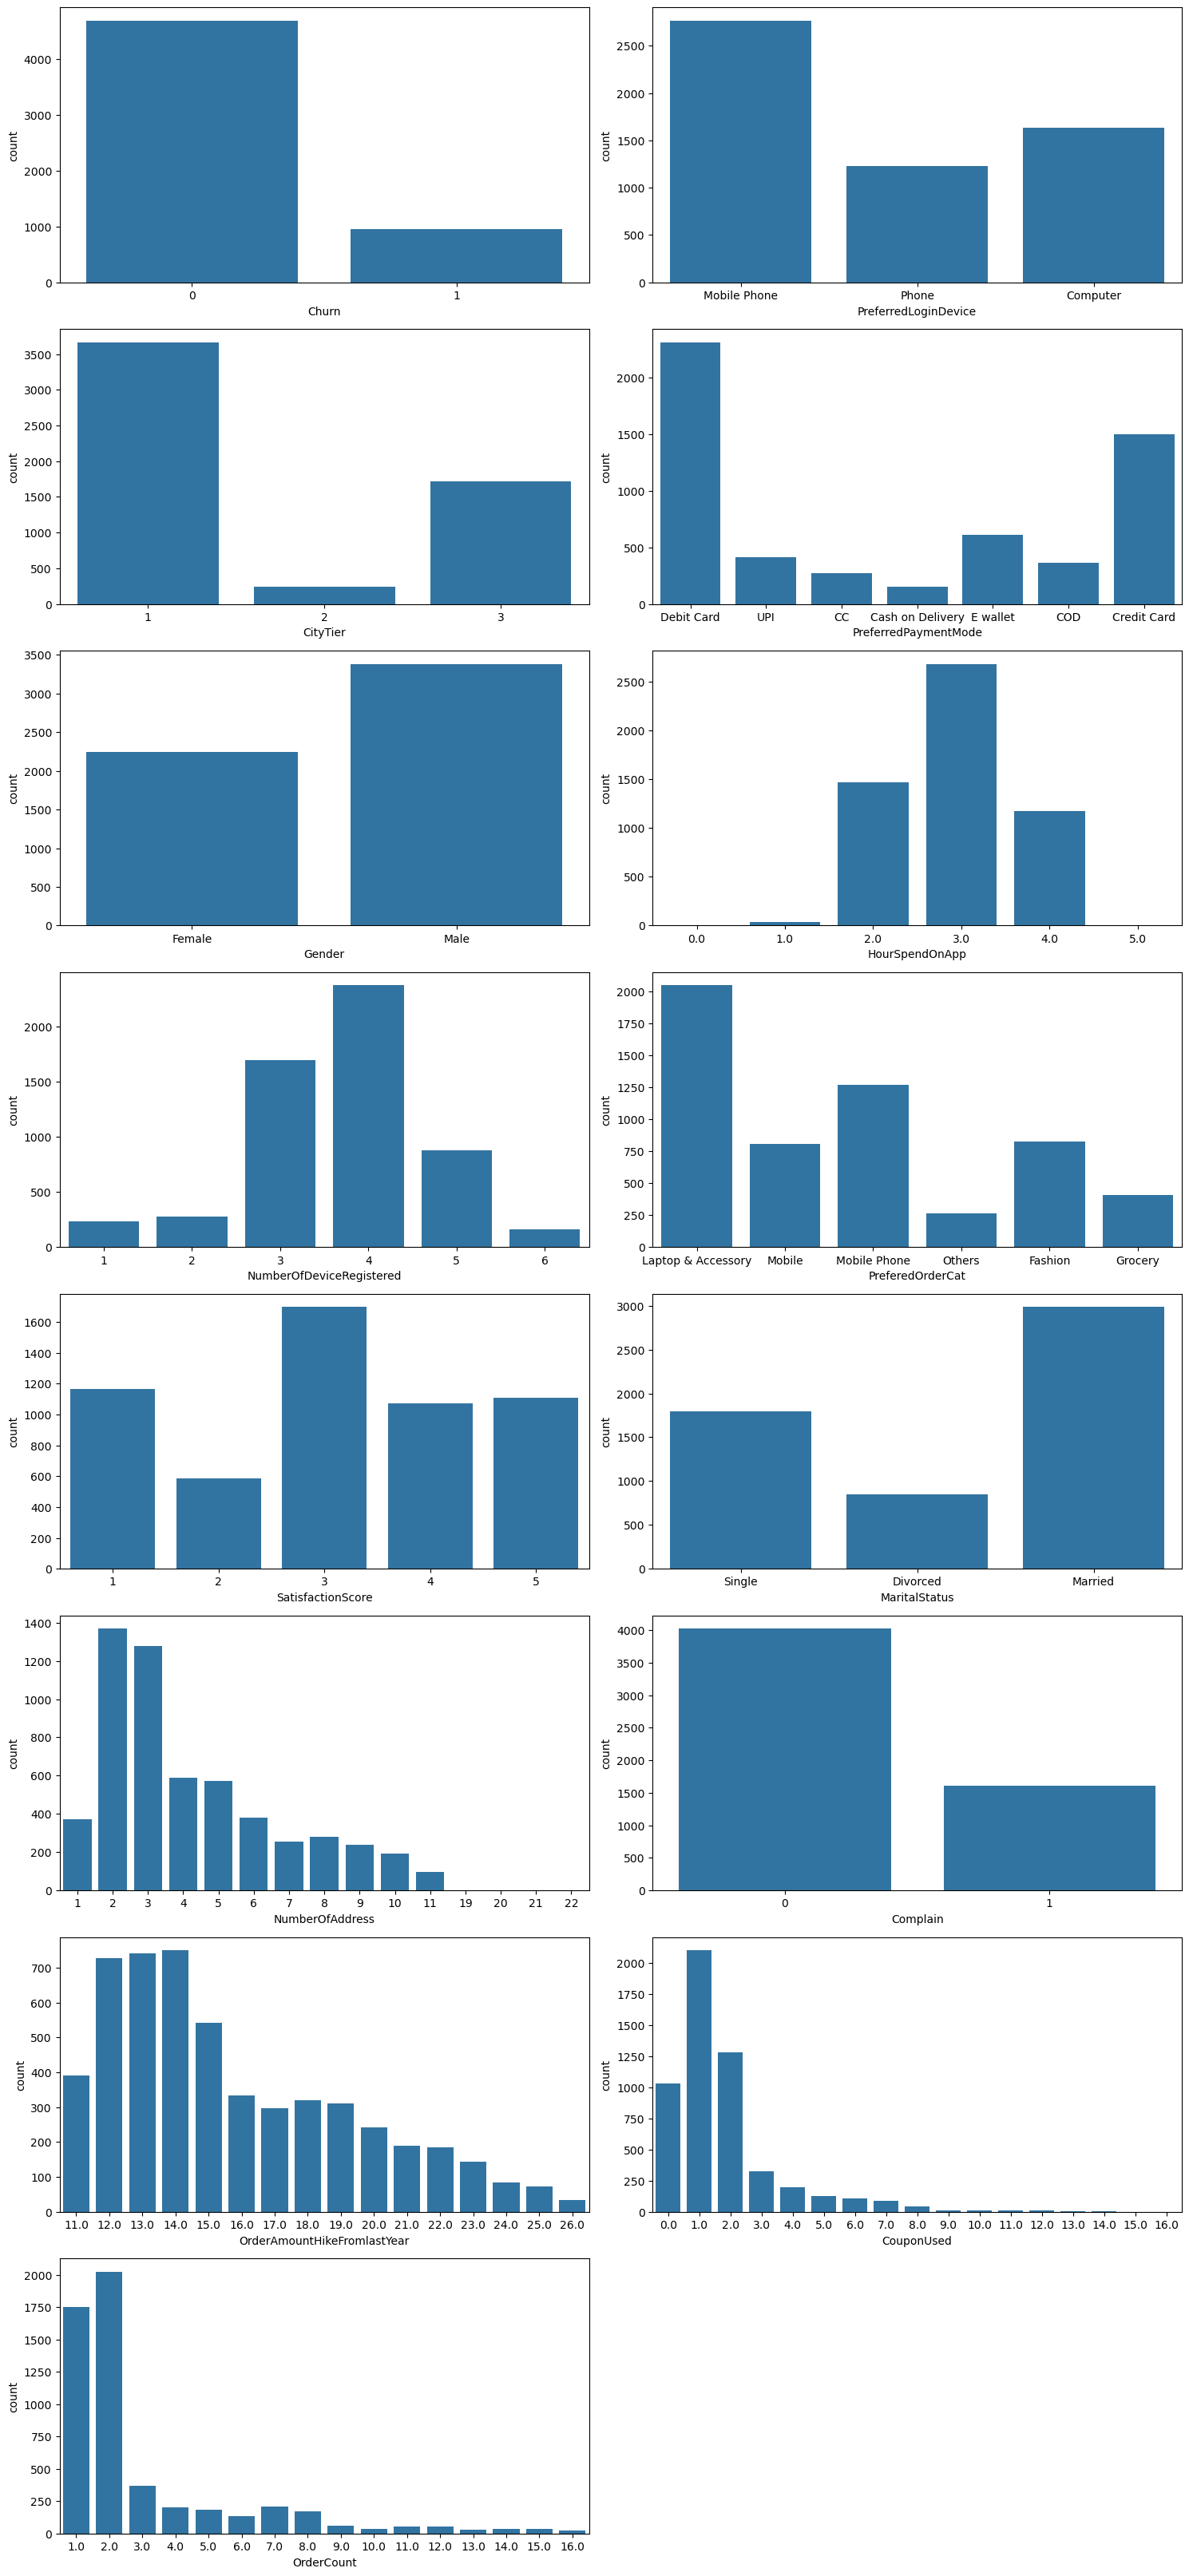

In [302]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    plt.subplot(10,2,plot_num)
    sns.countplot(data=df, x=col)
    plot_num += 1
    plt.tight_layout()

#### 4.2 Histograms of numerical columns

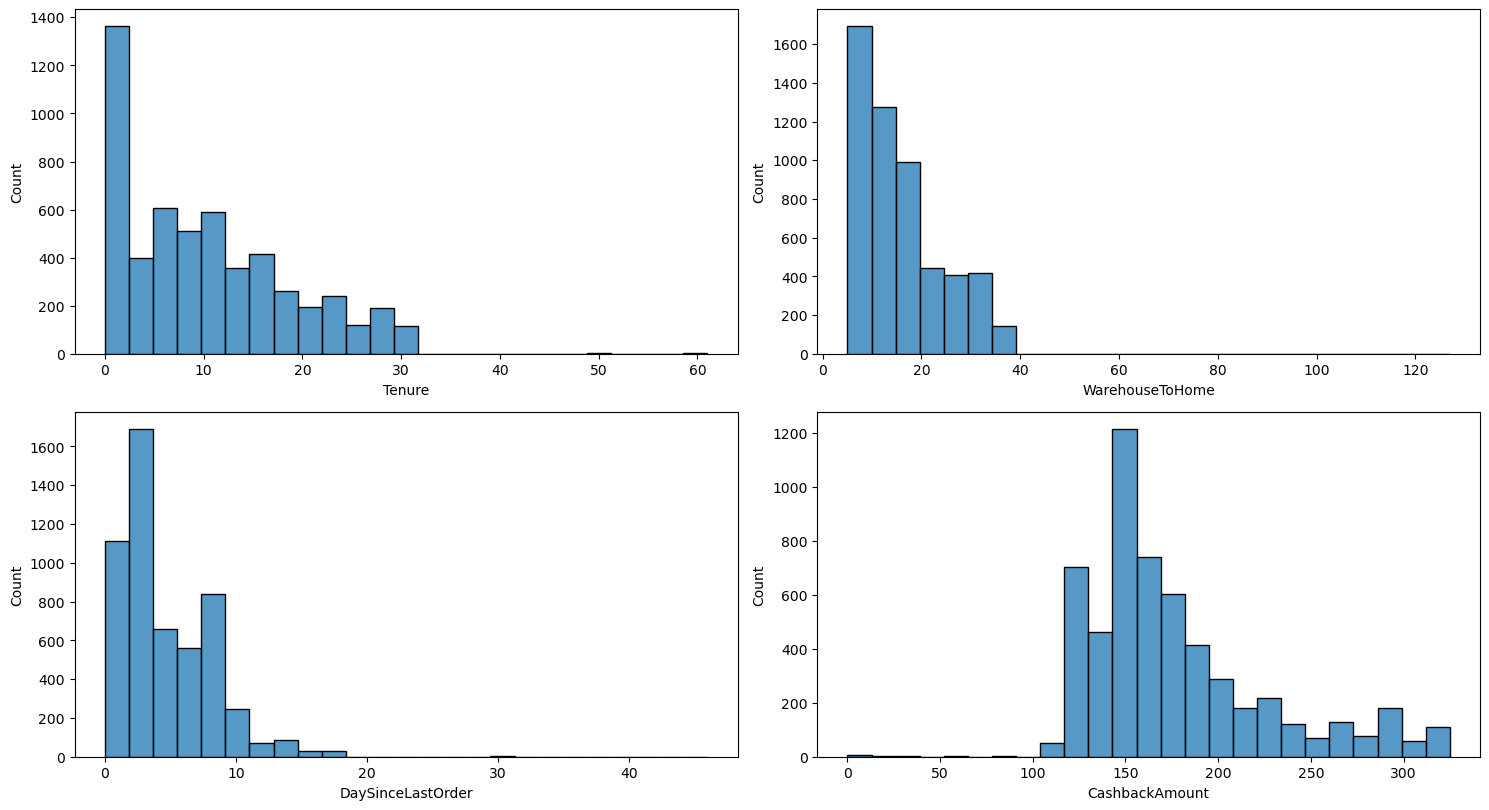

In [304]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in hist_col:
    plt.subplot(10,2,plot_num)
    sns.histplot(data=df, x=col,bins=25)
    plot_num += 1
    plt.tight_layout()

#### 4.3 Plot the Churn distribution for each categorical variable

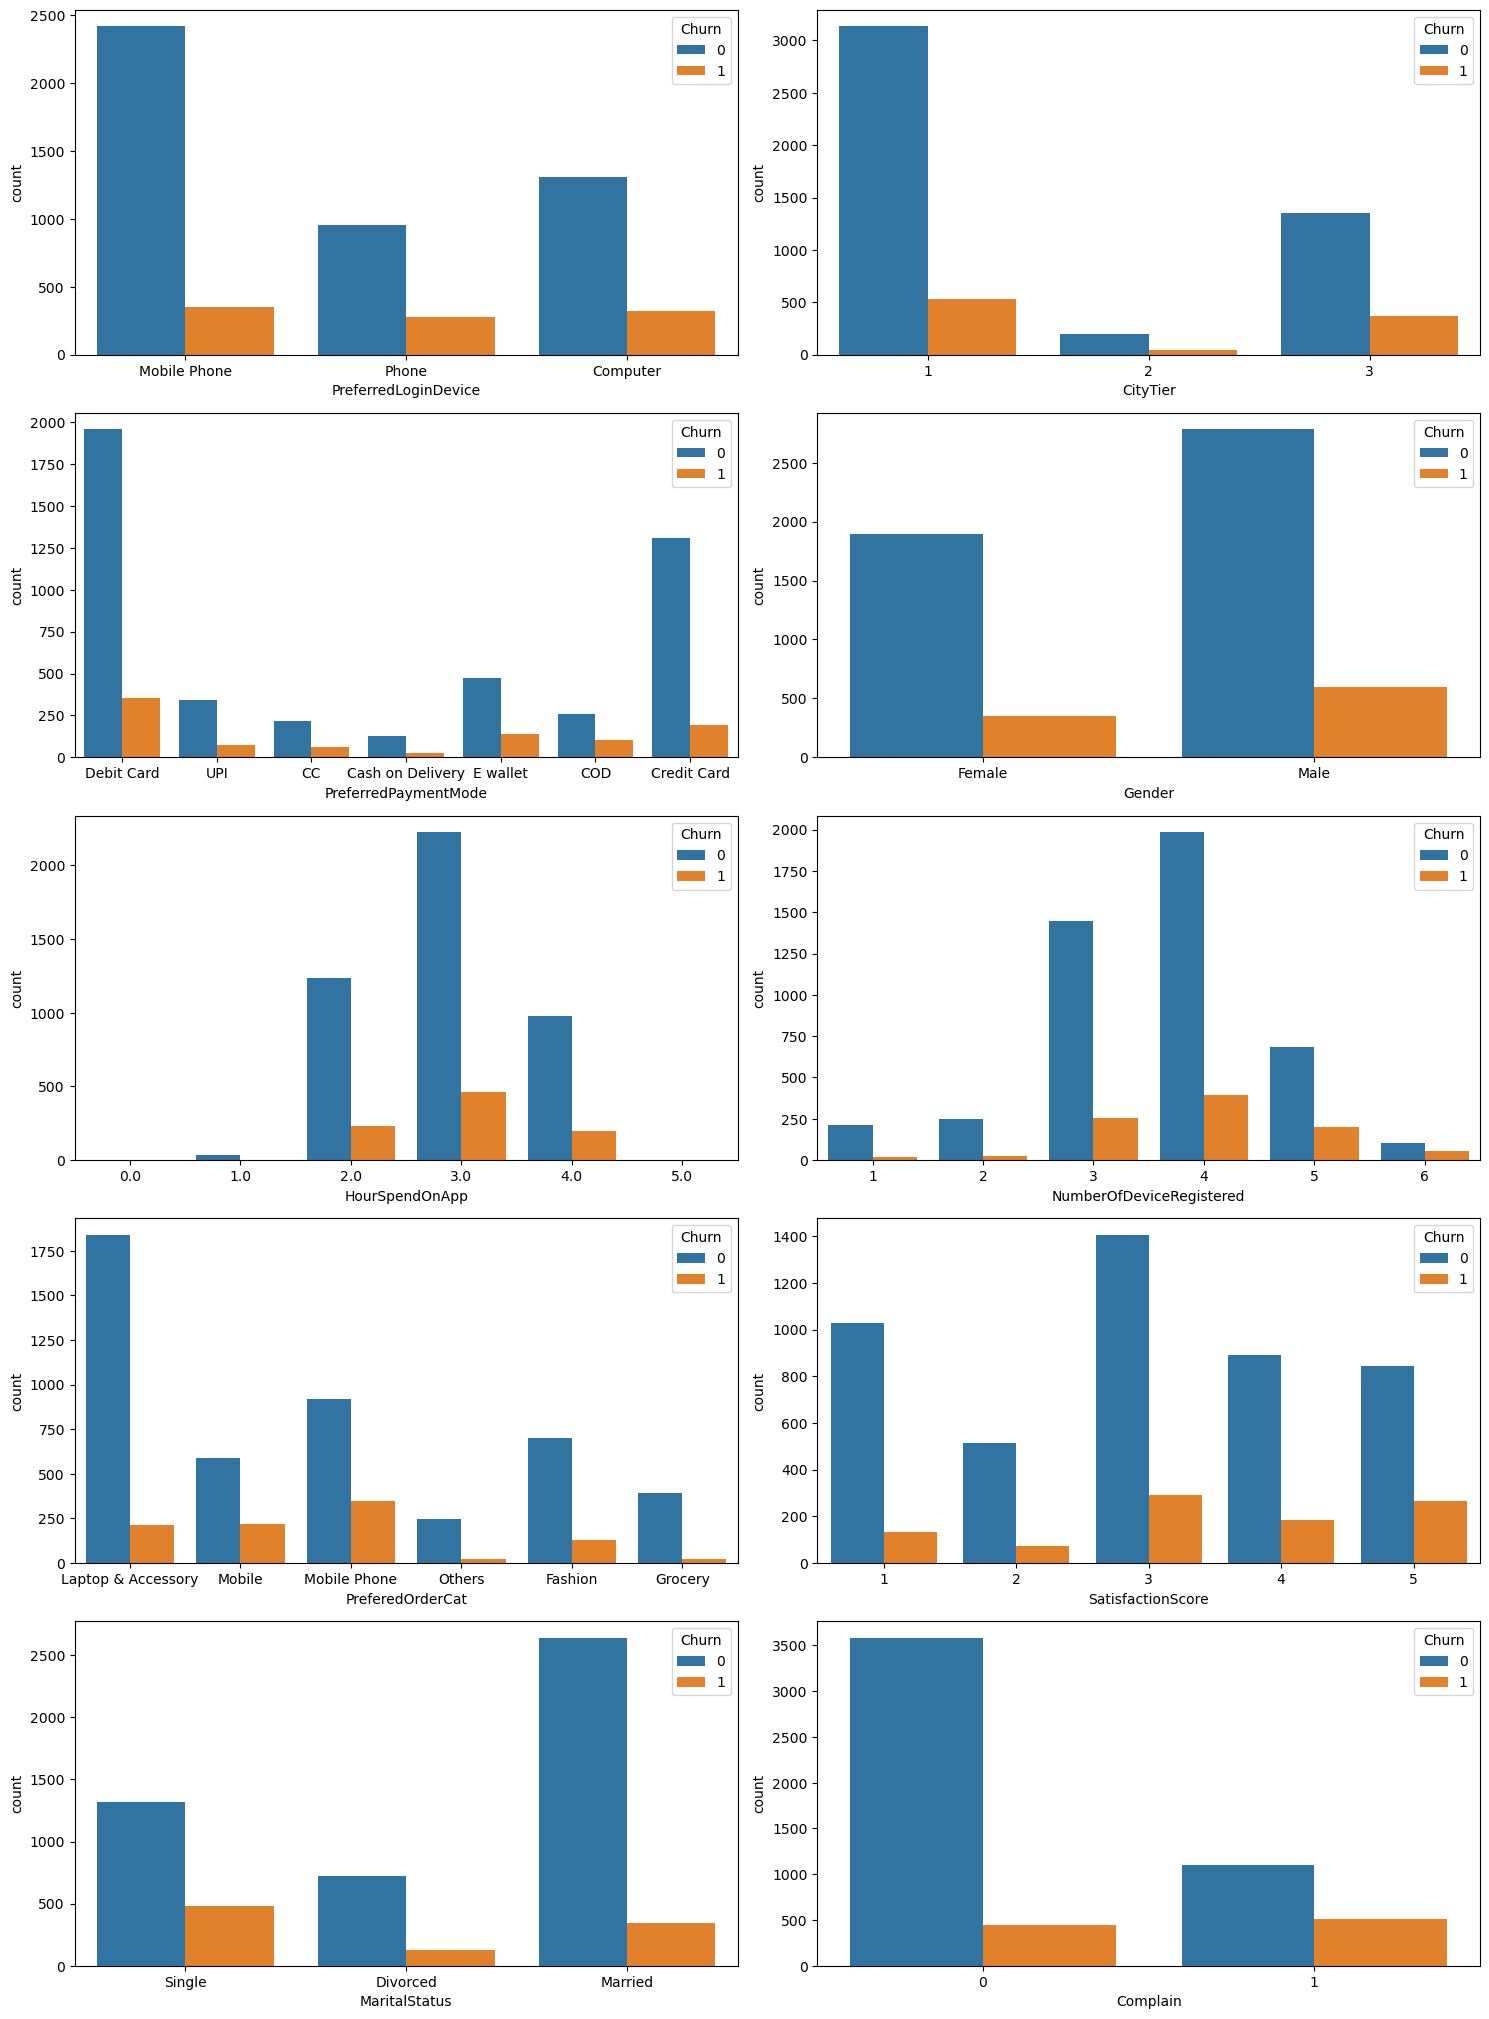

In [306]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    if df[col].nunique() <= 8 and col != "Churn":
        plt.subplot(10,2,plot_num)
        sns.countplot(data=df, x=col, hue="Churn")
        plot_num += 1
        plt.tight_layout()

## 5. Impute Missing Values

In [308]:
def fill_missing_values(df, random_state=None):
    # Step 1: Identify numeric and categorical columns
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()  # Include both string and category data

    # Step 2: Impute numeric columns
    numeric_imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

    # Step 3: Handle categorical columns
    for col in categorical_columns:
        if df[col].dtype == 'object':
            # Convert categorical column to one-hot encoded representation
            encoded_cols = pd.get_dummies(df[col], prefix=col)
            # Concatenate one-hot encoded columns (by dropping the previous columns and adding the new columns it created now)
            df = pd.concat([df.drop(col, axis=1), encoded_cols], axis=1)

    # Step 4: Random Forest Iterative Imputer for the entire DataFrame
    rf_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=random_state))
    df = pd.DataFrame(rf_imputer.fit_transform(df), columns=df.columns)
    
    return df

# Call the function to fill missing values
df = fill_missing_values(df, random_state=42)

In [309]:
df

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1.0,4.000000,3.0,6.0,3.000000,3.0,2.0,9.0,1.0,11.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,10.189899,1.0,8.0,3.000000,4.0,3.0,7.0,1.0,15.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,10.189899,1.0,30.0,2.000000,4.0,3.0,6.0,1.0,14.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.000000,3.0,15.0,2.000000,4.0,5.0,8.0,0.0,23.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.000000,1.0,12.0,2.931535,3.0,5.0,3.0,0.0,11.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0.0,10.000000,1.0,30.0,3.000000,2.0,1.0,6.0,0.0,18.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5626,0.0,13.000000,1.0,13.0,3.000000,5.0,5.0,6.0,0.0,16.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5627,0.0,1.000000,1.0,11.0,3.000000,2.0,4.0,3.0,1.0,21.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5628,0.0,23.000000,3.0,9.0,4.000000,5.0,4.0,4.0,0.0,15.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## 6. Model Building

#### 6.1 Split Dataset into Training set and Test set

In [312]:
x = df.drop(columns=["Churn"])
y = df["Churn"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### 6.2 Handling the Imbalanced dataset

In [314]:
from imblearn.over_sampling import SMOTE

print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))
# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=1)   
x_train_s, y_train_s = sm.fit_resample(x_train, y_train.ravel())
                                         
print('After upsampling count of label 0 {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_s==1)))

Before upsampling count of label 0 3743
Before upsampling count of label 1 761
After upsampling count of label 0 3743
After upsampling count of label 1 3743


#### 6.3 Model Evaluation

In [316]:
# Initialize models
models = [
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    LogisticRegressionCV(),
    KNeighborsClassifier(),
    XGBClassifier()
]

# Metrics columns
metrics_cols = ['model_name', 'test_accuracy', 'test_precision', 'test_recall', 'test_f1']
results = []

# Scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Cross-validation
for model in models:
    cv_results = cross_validate(model, x, y, cv=5, scoring=scoring, return_train_score=False)
    
    # Collect model name and scores
    results.append([
        model.__class__.__name__,
        round(cv_results['test_accuracy'].mean(), 3) * 100,
        round(cv_results['test_precision'].mean(), 3) * 100,
        round(cv_results['test_recall'].mean(), 3) * 100,
        round(cv_results['test_f1'].mean(), 3) * 100
    ])

# Create DataFrame
model_metrics = pd.DataFrame(results, columns=metrics_cols)

# Sort by accuracy and style
model_metrics = model_metrics.sort_values('test_accuracy', ascending=False)
model_metrics = model_metrics.style.background_gradient(subset=['test_accuracy', 'test_f1'], cmap='summer')

model_metrics

,model_name,test_accuracy,test_precision,test_recall,test_f1
5,XGBClassifier,99.300000,98.200000,97.600000,97.900000
2,RandomForestClassifier,98.600000,99.000000,92.400000,95.600000
1,GradientBoostingClassifier,91.900000,85.200000,62.800000,72.200000
0,AdaBoostClassifier,89.800000,75.800000,58.200000,65.800000
3,LogisticRegressionCV,89.500000,79.200000,50.800000,61.900000
4,KNeighborsClassifier,87.500000,70.400000,44.800000,54.800000


## 7. Building Final Model

In [318]:
final_model=XGBClassifier()
final_model.fit(x_train, y_train)
train_pred = final_model.predict(x_train)
test_pred = final_model.predict(x_test)

final_model.score(x_test, y_test)

0.9769094138543517

Feature Importance of XGBoost Model

Importance_type
- ‘weight’ - the number of times a feature is used to split the data across all trees.
- ‘gain’ - the average gain across all splits the feature is used in.

Feature Importance Gain


<Axes: >

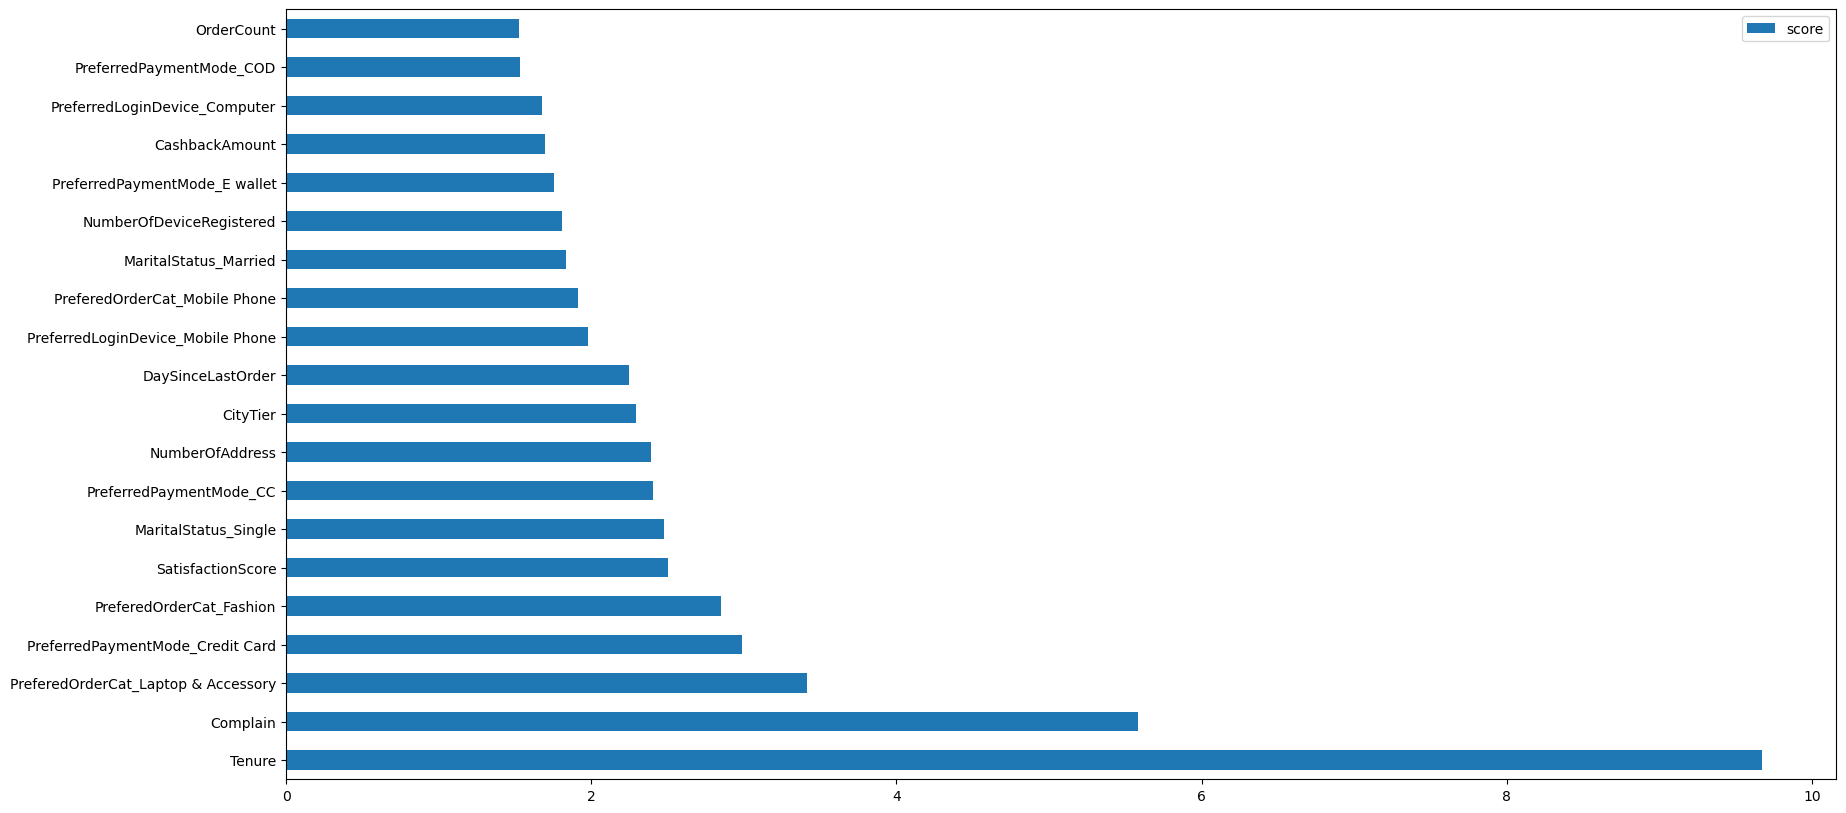

In [320]:
print("Feature Importance Gain")
feature_important = final_model.get_booster().get_score(importance_type="gain")
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(20, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

Feature Importance Weight


<Axes: >

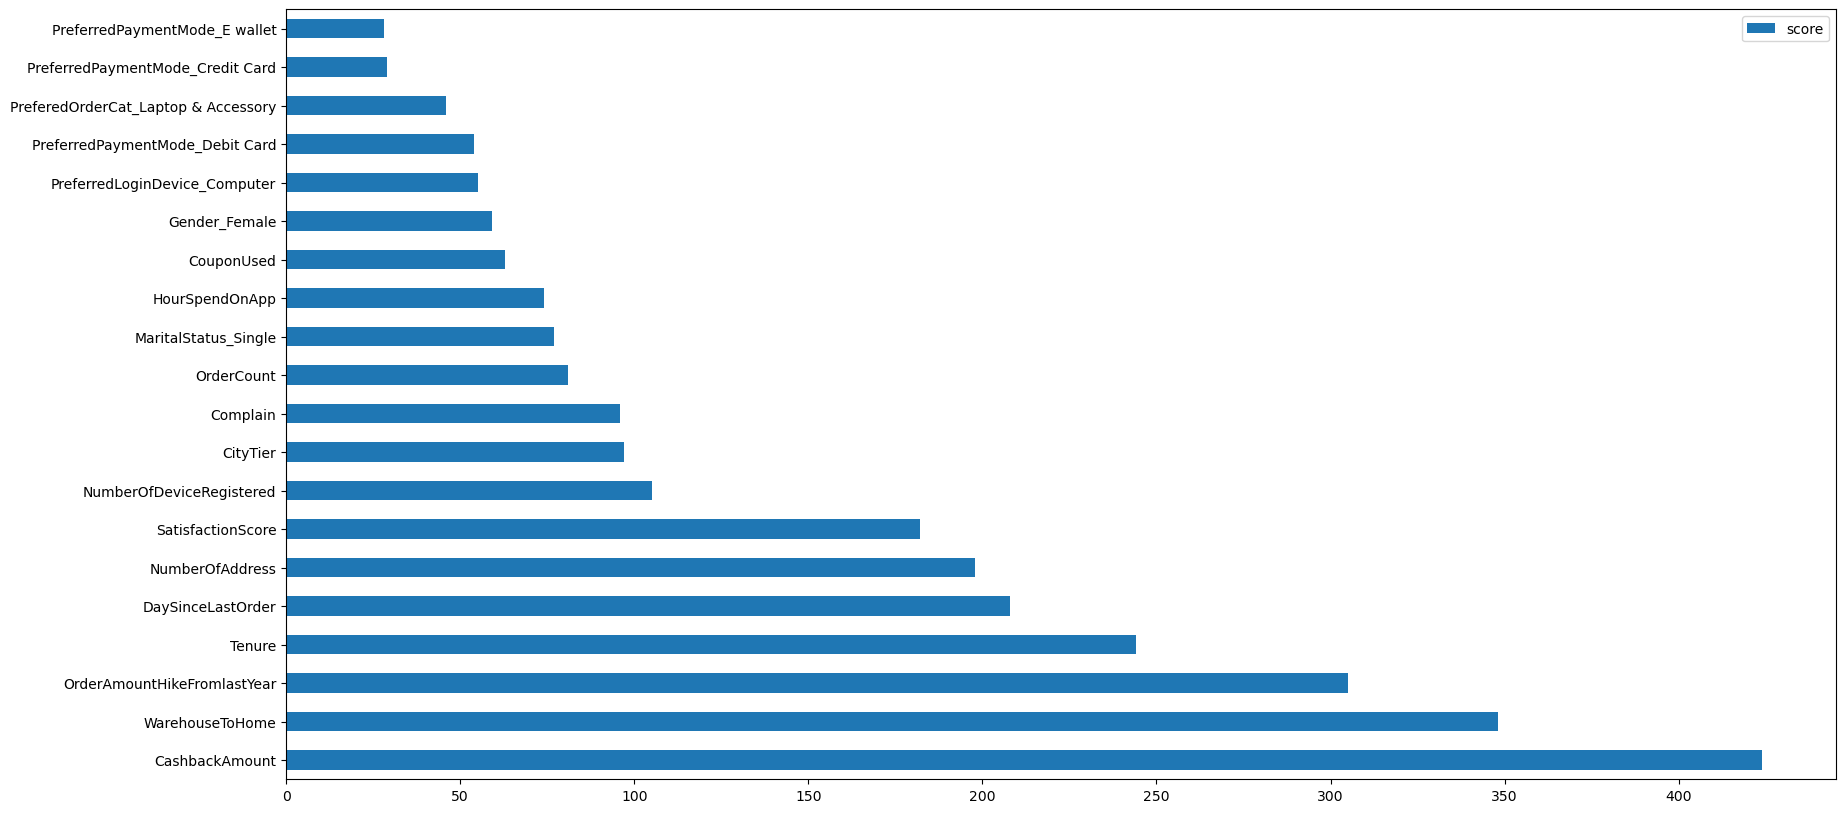

In [321]:
print("Feature Importance Weight")
feature_important = final_model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(20, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

The features that will be used for final deployment model are:   
1. Tenure
2. 
Cashback amoun
3. 
City ti
4. r
Warehouse to h
5. me
Order amount hike from last 
6. ear
Days ince last
7. rder
Satisfaction
8. score
Number of 
9. ddress
Number ofdevice re
10. istered
11. Complain
O
12. der count
hou
13. spendonapp
Ma
14. ital status
15. 
Coupon used
Genderon used
Gender

In [323]:
## Drop the columns which are not required

cols_to_drop = ['PreferredLoginDevice_Computer','PreferredLoginDevice_Mobile Phone','PreferredLoginDevice_Phone','PreferredPaymentMode_CC', 
       'PreferredPaymentMode_COD','PreferredPaymentMode_Cash on Delivery','PreferredPaymentMode_Credit Card','PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet','PreferredPaymentMode_UPI','PreferedOrderCat_Fashion','PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory','PreferedOrderCat_Mobile','PreferedOrderCat_Mobile Phone','PreferedOrderCat_Others']
x.drop(cols_to_drop, axis = 1, inplace = True)

In [324]:
x_train.drop(cols_to_drop, axis = 1, inplace = True)
x_test.drop(cols_to_drop, axis = 1, inplace = True)

In [325]:
x

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4.000000,3.0,6.0,3.000000,3.0,2.0,9.0,1.0,11.0,1.0,1.0,5.000000,159.93,1.0,0.0,0.0,0.0,1.0
1,10.189899,1.0,8.0,3.000000,4.0,3.0,7.0,1.0,15.0,0.0,1.0,0.000000,120.90,0.0,1.0,0.0,0.0,1.0
2,10.189899,1.0,30.0,2.000000,4.0,3.0,6.0,1.0,14.0,0.0,1.0,3.000000,120.28,0.0,1.0,0.0,0.0,1.0
3,0.000000,3.0,15.0,2.000000,4.0,5.0,8.0,0.0,23.0,0.0,1.0,3.000000,134.07,0.0,1.0,0.0,0.0,1.0
4,0.000000,1.0,12.0,2.931535,3.0,5.0,3.0,0.0,11.0,1.0,1.0,3.000000,129.60,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,10.000000,1.0,30.0,3.000000,2.0,1.0,6.0,0.0,18.0,1.0,2.0,4.000000,150.71,0.0,1.0,0.0,1.0,0.0
5626,13.000000,1.0,13.0,3.000000,5.0,5.0,6.0,0.0,16.0,1.0,2.0,4.543491,224.91,0.0,1.0,0.0,1.0,0.0
5627,1.000000,1.0,11.0,3.000000,2.0,4.0,3.0,1.0,21.0,1.0,2.0,4.000000,186.42,0.0,1.0,0.0,1.0,0.0
5628,23.000000,3.0,9.0,4.000000,5.0,4.0,4.0,0.0,15.0,2.0,2.0,9.000000,178.90,0.0,1.0,0.0,1.0,0.0


## 8. Evaluating Final Model

In [327]:
# Convert the Pandas datafram to NumPy array for the XGBoost classifier. 
# The conversion helps in loading and predicting values in the flask app.

x_test = x_test.values
x_train = x_train.values

In [328]:
# Run the model
final_model=XGBClassifier()
final_model.fit(x_train, y_train)
train_pred = final_model.predict(x_train)
test_pred = final_model.predict(x_test)

final_model.score(x_test, y_test)

0.9724689165186501

## 9. Save the Model

In [330]:
import pickle
pickle_out = open('churn_prediction_model.pkl','wb')
pickle.dump(final_model,pickle_out)
pickle_out.close()

In [331]:
import json
import os

# Define the directory path
directory = 'models/'

# Create the directory if it doesn't exist
os.makedirs(directory, exist_ok=True)  # exist_ok=True prevents error if the directory already exists

# Prepare the columns data
columns = {'data_columns': [col.lower() for col in x.columns]}

# Write the data to the json file
with open(os.path.join(directory, "columns.json"), "w") as f:
    f.write(json.dumps(columns))